### View SCOPE-MRI MRIs


Displaying sequences for MRI ID: 24-0025-0001-01 in split: train
Loaded: 24-0025-0001_24-0025-0001-01_MR8_COR_obl_T2_FS_9612f193 | Shape: (25, 512, 512)


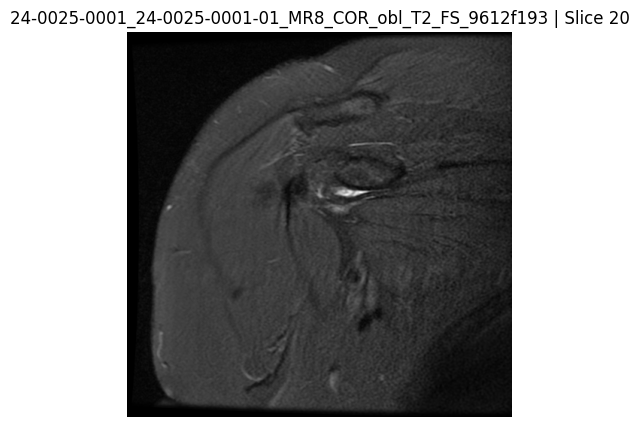

Loaded: 24-0025-0001_24-0025-0001-01_MR6_COR_obl_T2_56bafa85 | Shape: (25, 512, 512)


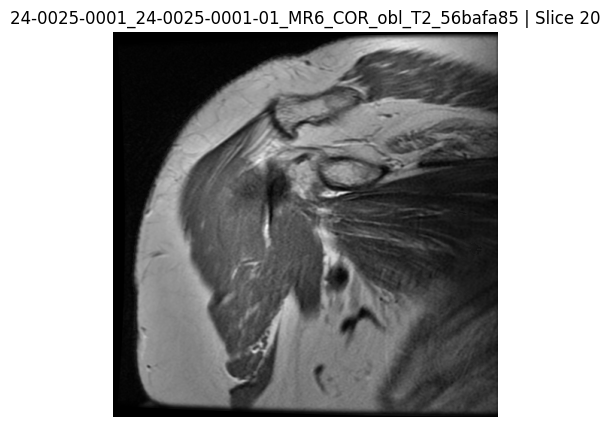

Loaded: 24-0025-0001_24-0025-0001-01_MR3_AX_T1_RPT_62817875 | Shape: (27, 512, 512)


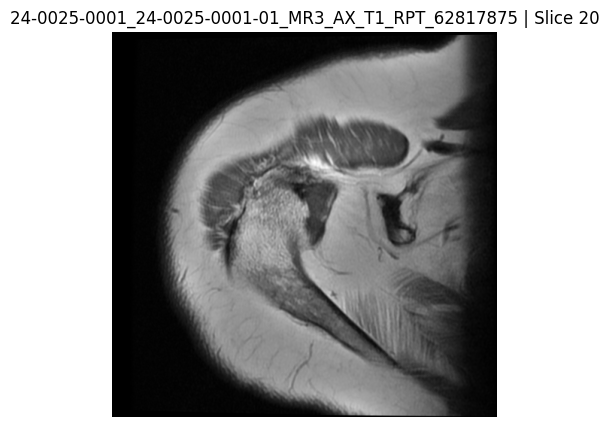

Loaded: 24-0025-0001_24-0025-0001-01_MR1_RT_3-PLANE_LOC_fa7feb57 | Shape: (27, 512, 512)


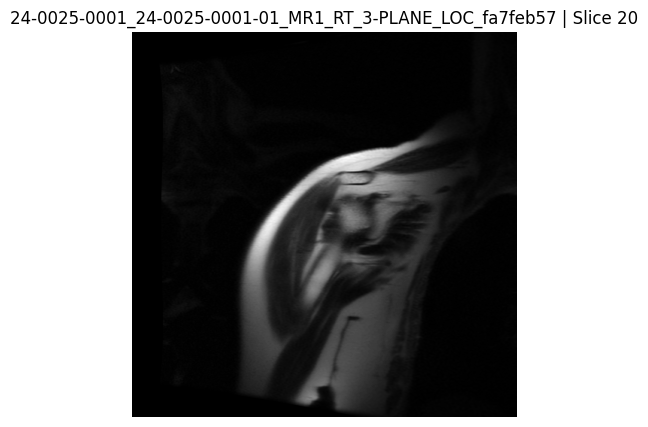

Loaded: 24-0025-0001_24-0025-0001-01_MR7_COR_obl_PD_18e09e13 | Shape: (25, 512, 512)


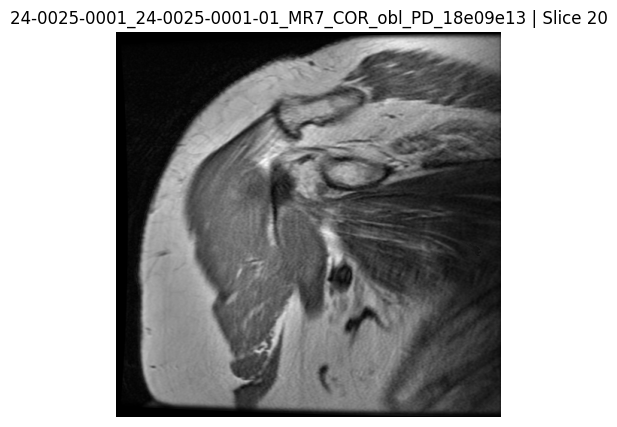

Loaded: 24-0025-0001_24-0025-0001-01_MR4_AX_T2_FS_548f623d | Shape: (27, 512, 512)


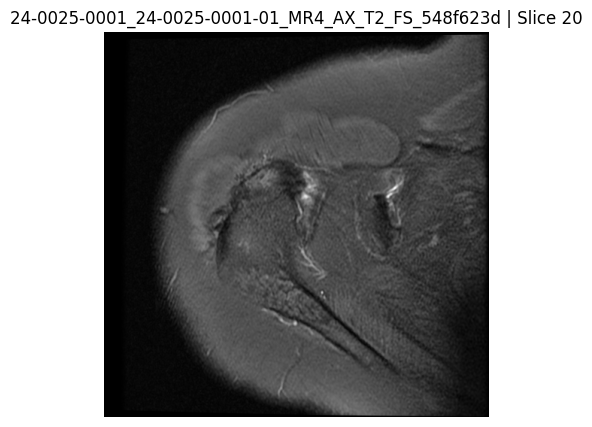

Loaded: 24-0025-0001_24-0025-0001-01_MR5_AX_T1_SPGR_FS_PRE_0a6775e5 | Shape: (27, 512, 512)


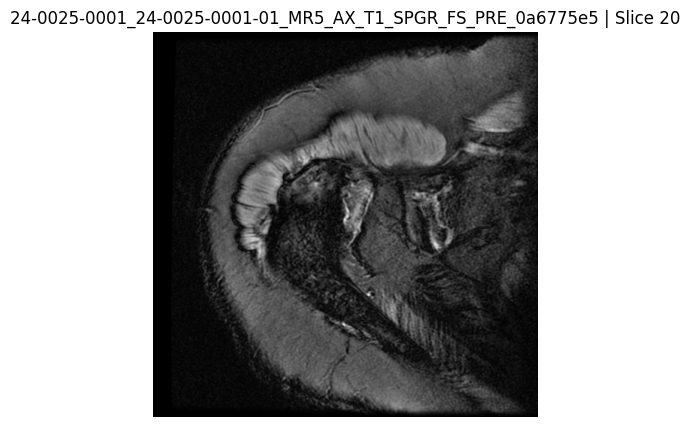

Loaded: 24-0025-0001_24-0025-0001-01_MR9_SAG_obl_T2_FS_9318ea9e | Shape: (27, 512, 512)


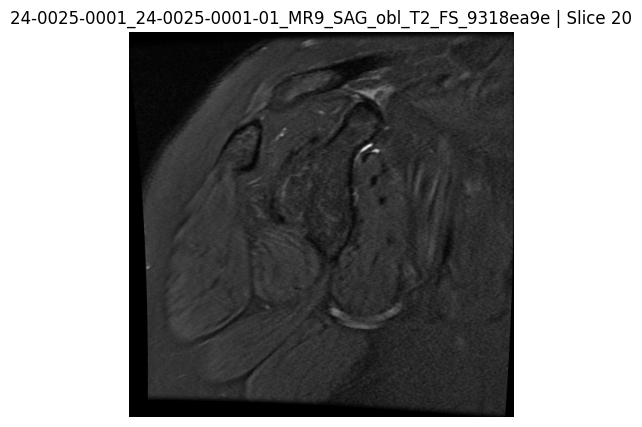

Loaded: 24-0025-0001_24-0025-0001-01_MR10_AX_T1_SPGR_FS_POST_4aa98102 | Shape: (27, 512, 512)


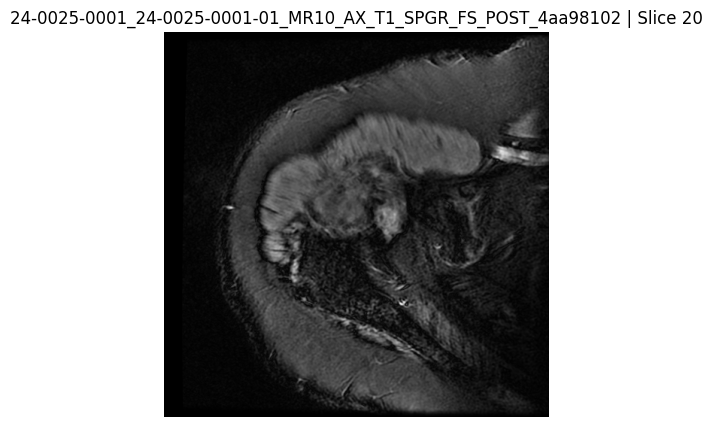

MRI ID 24-0025-0001-01 not found in val
MRI ID 24-0025-0001-01 not found in test


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIGURATION ===
base_path = '/Users/sahilsethi/Desktop/Ortho ML Labrum Tears/preprocessed_MRIs2/final_SLAP_data_test'
slice_number = 20  # Slice to display
target_mri_id = '24-0025-0001-01'
splits = ['train', 'val', 'test']

def show_slice(volume, slice_index, title):
    plt.figure(figsize=(5, 5))
    try:
        plt.imshow(volume[slice_index, :, :], cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    except IndexError:
        print(f"Slice index {slice_index} is out of bounds for volume with shape {volume.shape}.")

def display_sequences_for_target_mri_id(split_path, target_mri_id):
    metadata_path = os.path.join(split_path, 'metadata.csv')
    if not os.path.exists(metadata_path):
        print(f"metadata.csv not found in {split_path}")
        return
    
    metadata = pd.read_csv(metadata_path)
    
    # Filter for target MRI ID
    mri_df = metadata[metadata['mri_id'] == target_mri_id]
    
    if mri_df.empty:
        print(f"MRI ID {target_mri_id} not found in {os.path.basename(split_path)}")
        return

    print(f"\nDisplaying sequences for MRI ID: {target_mri_id} in split: {os.path.basename(split_path)}")

    for _, row in mri_df.iterrows():
        unique_id = row['unique_id']
        sequence_path = os.path.join(split_path, str(target_mri_id), f"{unique_id}.npy")

        if not os.path.exists(sequence_path):
            print(f"File not found: {sequence_path}")
            continue

        try:
            array = np.load(sequence_path)
            print(f"Loaded: {unique_id} | Shape: {array.shape}")
            show_slice(array, slice_number, title=f"{unique_id} | Slice {slice_number}")
        except Exception as e:
            print(f"Failed to load or display {sequence_path}: {e}")

# === Run for all splits ===
for split in splits:
    split_path = os.path.join(base_path, split)
    display_sequences_for_target_mri_id(split_path, target_mri_id)



Displaying MRI slices for ID: 0001 | Split: train

Loaded coronal view | Shape: (20, 256, 256)


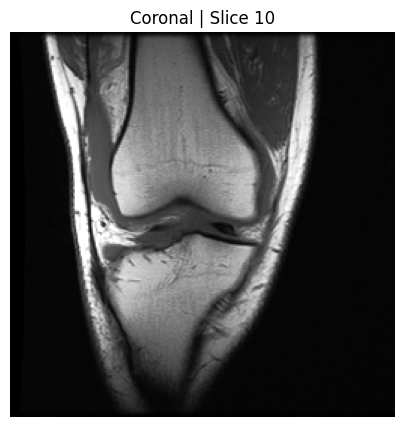

Loaded sagittal view | Shape: (26, 256, 256)


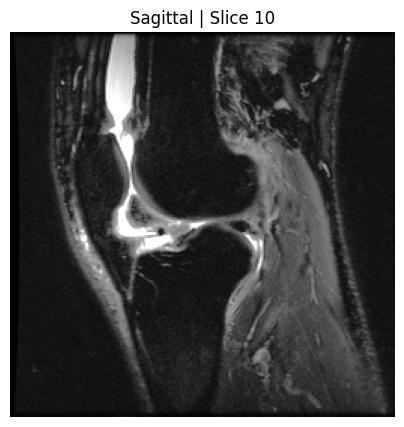

Loaded axial view | Shape: (30, 256, 256)


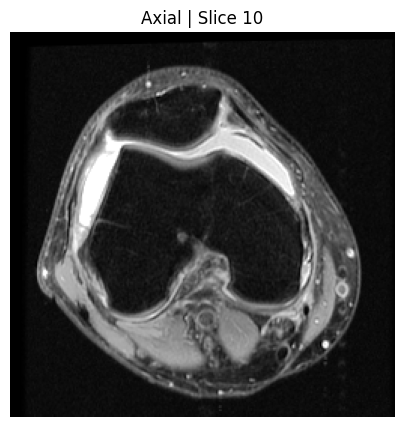

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

# === CONFIGURATION ===
base_path = '/Users/sahilsethi/Desktop/Ortho ML Labrum Tears/MRNet-v1.0' 
split = 'train'  # or 'valid'
mri_id = '0001'  # should match the .npy filename, e.g., '0001.npy'
slice_number = 10  # which slice to display

views = ['coronal', 'sagittal', 'axial']

def show_slice(volume, slice_index, view_name):
    plt.figure(figsize=(5, 5))
    
    try:
        if view_name == 'axial':
            img = volume[slice_index, :, :]
        elif view_name == 'coronal':
            img = volume[slice_index, :, :]
        elif view_name == 'sagittal':
            img = volume[slice_index, :, :]
        else:
            raise ValueError(f"Unknown view: {view_name}")

        plt.imshow(img, cmap='gray')
        plt.title(f'{view_name.capitalize()} | Slice {slice_index}')
        plt.axis('off')
        plt.show()
        
    except IndexError:
        print(f"Slice {slice_index} out of bounds for view '{view_name}' with shape {volume.shape}")

def display_mri_slices(base_path, split, mri_id, slice_number):
    print(f"\nDisplaying MRI slices for ID: {mri_id} | Split: {split}\n")
    
    for view in views:
        file_path = os.path.join(base_path, split, view, f"{mri_id}.npy")

        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        try:
            array = np.load(file_path)
            print(f"Loaded {view} view | Shape: {array.shape}")
            show_slice(array, slice_number, view_name=view)
        except Exception as e:
            print(f"Error loading or displaying {file_path}: {e}")

# === RUN THE FUNCTION ===
display_mri_slices(base_path, split, mri_id, slice_number)
